### Description and Motivation:
This project analyzes the data from the customers of a retail company, and try to understand the behaviour of their customers. That can give the company a lot of insights on how to plan their next campaigns, who would be the target of a new product, what are the most important customers, etc.

- Link to the original dataset: https://www.kaggle.com/imakash3011/customer-personality-analysis

- It contains information of 2240 customers, such as their age, marital status, number of kids, education, income, number of purchases per channel, total spent per item, how many purchases had discount, whether they accepted their campaig noffers, etc. We have 29 attributes, that have a complete description on the original source.These attributes are:

#### People

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise

#### Products

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

#### Promotion

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

#### Place

- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

### Main Steps

• Introduction

• Preprocessing: Feature Engineering, removing nulls, removing outliers, changing categorical features and removing irrelevants variables.

• Exploratory Data Analysis (EDA): Some plots to understand our features distribution, and how they relate to each other

• Clustering: Scaling the features, Principal components analysis (PCA) and K-Means

• Evaluation of the results: Who are the customers assigned to each customer?

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score 
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Importing Data

In [2]:
## Reading the data
df = pd.read_csv(r'C:\Users\SHREE\Downloads\Python CODES\Retail Customer Segmentation\marketing_campaign.csv', sep = '\t')

## Basic info of the dataset
display(df.head(10))
display(df.shape)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


(2240, 29)

### Data Cleaning + Feature Engineering
We are going to create new features to the dataset, remove outliers, clean nulls, and change some categorical data.

#### Removing null values
First, we are going to do the good and old check for null values:

In [3]:
## Fill null values with the mean
display(df.isnull().sum())

df = df.fillna(df['Income'].mean())

assert (df.isnull().sum().sum() == 0)

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

- We had 24 null values in the “income” feature. That’s a very low value, and a good sign that our dataset is very consistent. We’ll fill those with the mean.

#### Creating new features

Now we are going to create some new features to help us.

In [4]:
# Feature engineering: Creating new, useful features

# Create a feature with the total spent for the client
df['total_spent'] = df['MntWines']  + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

# Create a feature with the % of money spent on essential item (food-related) 
df['pct_essentials'] = (df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'])/df['total_spent']

# Create a feature with the number of purchases for each client
df['num_purchases'] = df['NumWebPurchases']+df['NumCatalogPurchases'] + df['NumStorePurchases']+df['NumWebVisitsMonth']

# Create a feature with the number of children
df['num_children'] = df['Kidhome'] + df['Teenhome']

# Create a feature with the percentage of purchases made with a discount
df['pct_purchases_with_discount'] = df['NumDealsPurchases'] / df['num_purchases']
df['pct_purchases_with_discount'].fillna(0, inplace=True)

# Create a feature with the age of the client, and another with the number of days since he's enrolled with the company
df['dt_customer'] = pd.to_datetime(df['Dt_Customer'])

df['days_since_enrollment'] = ((datetime(2015,1,1) - df['dt_customer']).dt.days)

df['age'] =  2015 - df['Year_Birth']

##### Two of the most importants are:

- Percentage of purchases made with discount.
- Percentage of value spent on essential items (fruits + meat + fish + sweet)

#### Regrouping Categorical Values
Here is our problem: The feature containing the relationship status and the education, have a lot of categories and some of them are very similar to each other. It makes sense to regroup them, to make the analysis easier:

- In the relationship feature, we are going to have 2 groups: people who have a partner, and peoples who don’t.
- In the education feature, we are going to have 3 groups: Undergraduate, Graduated, and Postgraduate.

In [5]:
# Group some categories that have a similar meaning 
df['relationship'] = df['Marital_Status'].replace({'Married':1,'Together':1,
                            'Single':0, 'Divorced':0, 'Widow':0, 'Alone':0, 'Absurd':0,'YOLO':0})

df["education"] = df["Education"].replace({'Basic':'Undergraduate', '2n Cycle':'Undergraduate', 
                                           'Graduation':'Graduated', 'Master':'Postgraduate', 'PhD':'Postgraduate'})

#### Removing outliers
We are going to remove some customers that have extreme values, and are not in pace with the others.

In [6]:
## Removing outliers
df = df[(df['age'] < 90) & (df['Income'] < 200000)].reset_index(drop = True)

print("The new dataset have {} rows.".format(df.shape[0]))

The new dataset have 2236 rows.


- Okay, the new dataset have 2236 rows. Only 4 customers were removed in this process.

In [7]:
## Since there are just 2 values with 0 purchases and both of them with a low total spent, we'll replace the 0's with 1's.
df.loc[(df['num_purchases'] == 0,'num_purchases')]=1

#### Investigating “AcceptedCmp_N” features
In the original dataset, we have 5 features that indicate whether the client has accepted the correspondent offer: AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5.

- “AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise”

##### The features sounds great, but I have some questions:

- What happens if the customer have not been with the company long enough to receive all the offers?
- How can we guarantee that he saw those offers?
- What if he received more than 5 offers?

Let’s see how these features relate to the “pct_purchases_with_discount”. I expect them to have a strong correlation.

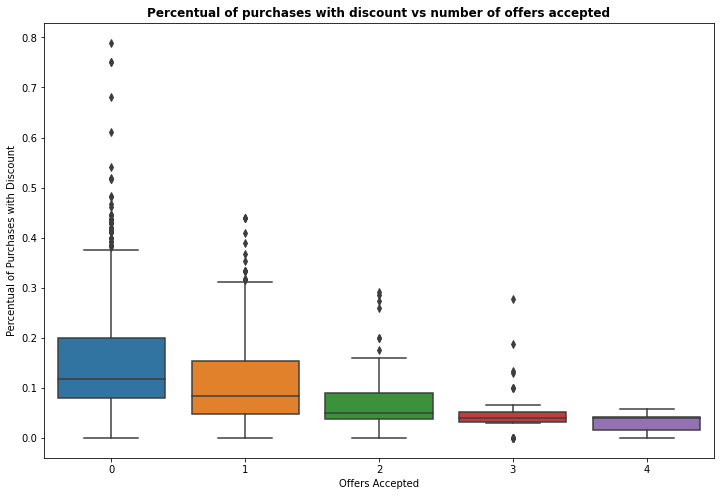

In [8]:
## Let's check the relationship between the "offers accepted", and the "percentual of purchases with discount"
df['accepted_sum'] = df['AcceptedCmp3']+df['AcceptedCmp4']+ df['AcceptedCmp5'] + df['AcceptedCmp1'] +df['AcceptedCmp2']
plt.figure(figsize = (12,8))
plt.title('Percentual of purchases with discount vs number of offers accepted', fontweight = 'bold')
sns.boxplot(data = df, x = 'accepted_sum', y = 'pct_purchases_with_discount')
plt.xlabel('Offers Accepted')
plt.ylabel('Percentual of Purchases with Discount');

- That's really not what we expected: they have an opposite correlation, which doesn't make sense. I'm not going to use these "accepted~" features, because of this incongruence, and because it's not really clear how they work: The description is: "1 if customer accepted the offer in the nst campaign, 0 otherwise". But what happens if the customer didn't receive all the offers (only received 3 of them, for example)? How can we garantee that he saw that offers? What if he received more than 5 offers? Since this features are confusing, I'll not use them, and use the "pct_purchases_with_discount" instead, that will give a similar idea, in a more straightfoward way.

### Droping columns: 
Since we are going to use perform clusterization ahead, it's important that we only keep the most important features, since we don't want the clusters to be created based on attributes that are not that important to us

In [9]:
df = df.drop(['NumWebVisitsMonth','Recency', 'Complain', 'Response', 'ID','Dt_Customer',
              'Year_Birth','Kidhome','Teenhome','MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 
              'MntSweetProducts', 'MntGoldProds', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
              'Z_CostContact','Z_Revenue', 'AcceptedCmp3','AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
              'AcceptedCmp2', 'Marital_Status', 'accepted_sum'], axis = 1)

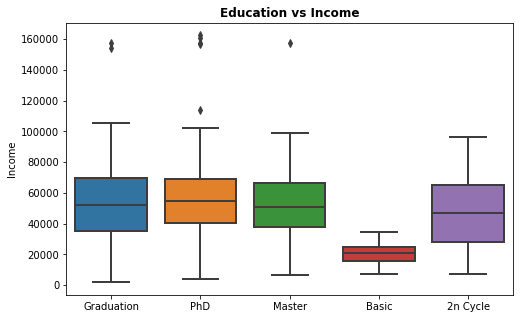

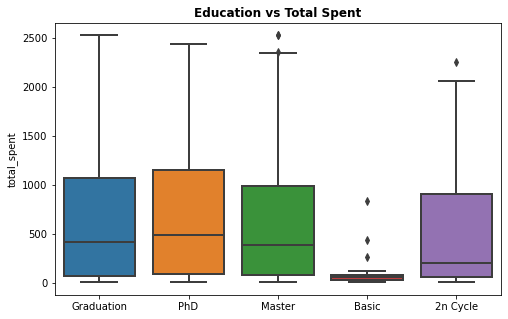

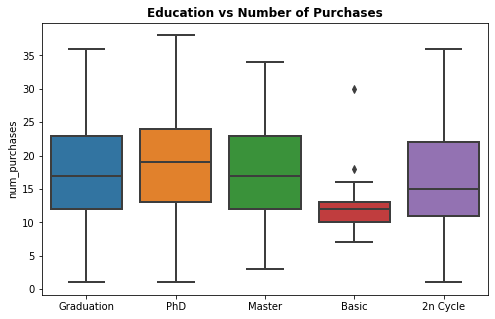

In [10]:
## Purchase behaviour vs Education
plt.figure(figsize = (8,5))
plt.title("Education vs Income", fontweight = 'bold', fontsize = 12)
sns.boxplot(y = df['Income'] , x = df['Education'], linewidth = 2)
plt.xlabel("")
plt.show()

plt.figure(figsize = (8,5))
plt.title("Education vs Total Spent", fontweight = 'bold', fontsize = 12)
sns.boxplot(y = df['total_spent'] , x = df['Education'], linewidth = 2)
plt.xlabel("")
plt.show()

plt.figure(figsize = (8,5))
plt.title("Education vs Number of Purchases", fontweight = 'bold', fontsize = 12)
sns.boxplot(y = df['num_purchases'] , x = df['Education'], linewidth = 2)
plt.xlabel("")
plt.show()

- Looking at the purchase behaviour, it's fair to say that graduates and postgraduates have a very similar behaviour. Therefore, we'll put them in the same category.

In [11]:
df["education"] = df["education"].replace({'Graduated':'Postgraduate'})
df['education'] = df['education'].replace({"Postgraduate": 1})
df['education'] = df['education'].replace({"Undergraduate": 0})
df.rename(columns={'education': 'high_education'}, inplace = True)

### Exploratory Data Analysis
Let's take a closer look at our remaining features, their distributions, and how they relate to each other.

In [12]:
# Some descriptive statistics
df.describe()

,Income,NumDealsPurchases,total_spent,pct_essentials,num_purchases,num_children,pct_purchases_with_discount,days_since_enrollment,age,relationship,high_education
count,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000
mean,51961.906544,2.326029,605.986583,0.421153,17.866279,0.950805,0.136283,538.179785,46.101968,0.644902,0.885957
std,21411.404811,1.933032,601.865156,0.194116,6.547265,0.752204,0.094970,232.311073,11.703281,0.478650,0.317935
min,1730.000000,0.000000,5.000000,0.027523,1.000000,0.000000,0.000000,26.000000,19.000000,0.000000,0.000000
25%,35502.500000,1.000000,69.000000,0.263047,12.000000,0.000000,0.066667,366.750000,38.000000,0.000000,1.000000
50%,51684.000000,2.000000,396.500000,0.428571,17.000000,1.000000,0.111111,539.000000,45.000000,1.000000,1.000000
75%,68275.750000,3.000000,1045.500000,0.570302,23.000000,1.000000,0.181818,712.000000,56.000000,1.000000,1.000000
max,162397.000000,15.000000,2525.000000,0.998844,38.000000,3.000000,0.789474,1089.000000,75.000000,1.000000,1.000000


In [13]:
## We'll create an auxiliar column, to help us with the visualization. It will be deleted afterwards.
df['age_group'] = df['age']//10*10

cat_columns = ['high_education','num_children', 'relationship', 'age_group']
num_columns = ['Income', 'NumDealsPurchases','total_spent','num_purchases', 
       'pct_purchases_with_discount', 'days_since_enrollment', 'pct_essentials']

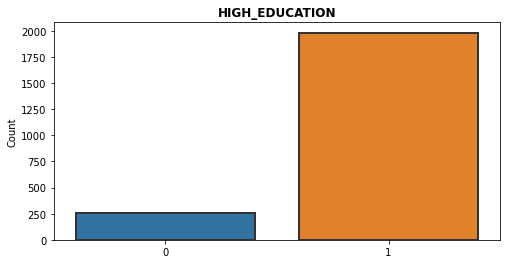

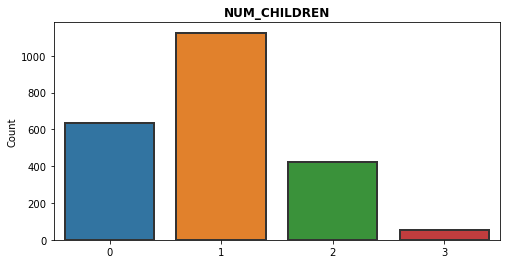

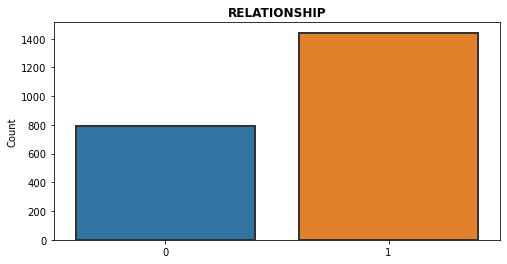

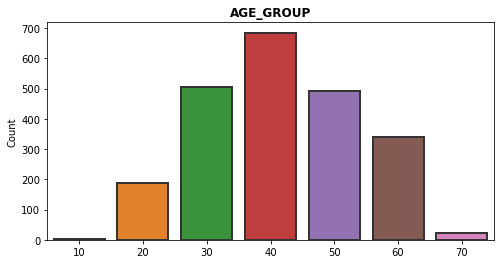

In [14]:
'''Categorical distributions (even though num_children and age_group are numerical variables,
for practical effects it makes a lot of sense to make their visualization as categorical)
'''

for cat in cat_columns:
    plt.figure(figsize = (8,4))
    plt.title(str.upper(cat), fontweight = 'bold')
    aux = df.groupby(cat).size().reset_index()#.rename({'pct_essentials':'count'}, axis = 1)
    ax = sns.barplot(x=cat, data=aux, y = 0, linewidth=2, edgecolor=".2").set(ylabel="Count", xlabel = None)
    
    plt.show()

##### Most of our customers:

- Are in a relationship
- Have a high_education (graduated or more)
- Have 1 children
- Are between 30~60 years

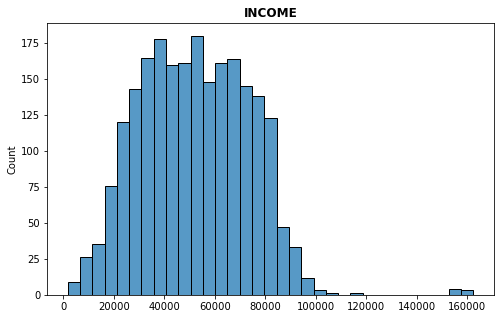

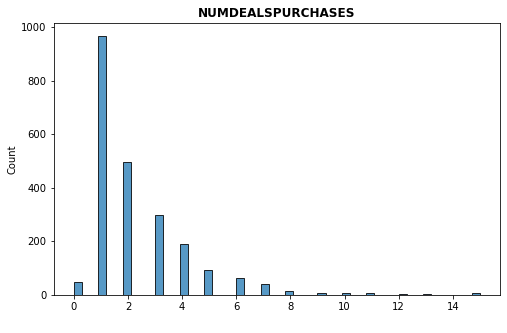

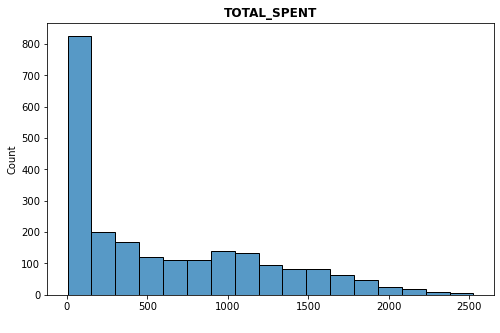

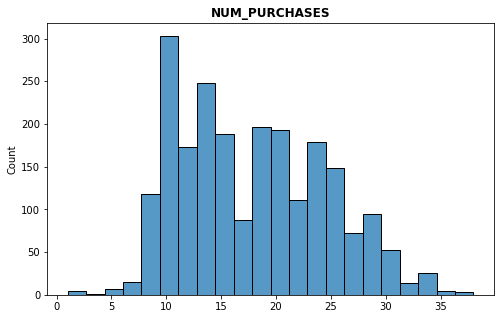

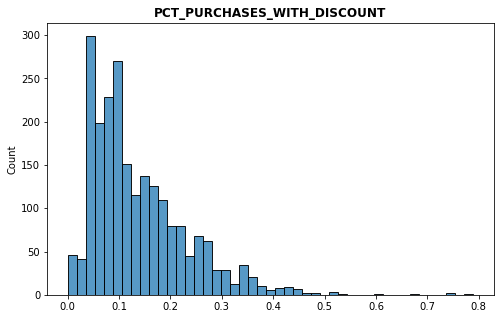

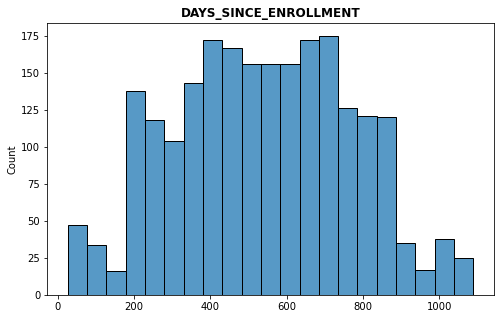

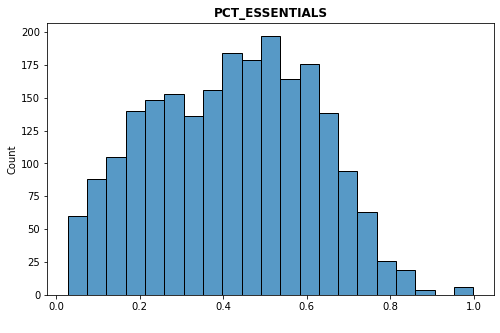

In [15]:
## Distribution of numerical variable

for num in num_columns:
    plt.figure(figsize = (8,5))
    plt.title(str.upper(num), fontweight = 'bold')
    ax = sns.histplot(x=num, data=df)
    ax.set_xlabel(" ")
    plt.show()

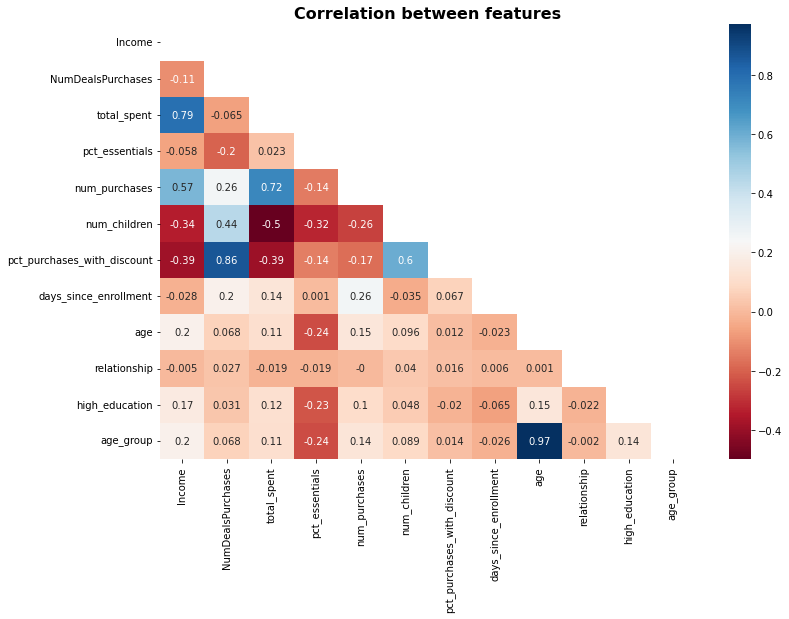

In [16]:
## Correlation Matrix
corr= df.corr()

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)

fig = plt.figure(figsize=(12,8))
plt.title('Correlation between features', fontsize = 16, fontweight = 'bold')
sns.heatmap(round(df.corr(),3), annot=True, cmap="RdBu", mask = matrix);

- Based on the correlation matrix, we can see a lot of variables that have a strong relationship. Let's take a closer look:

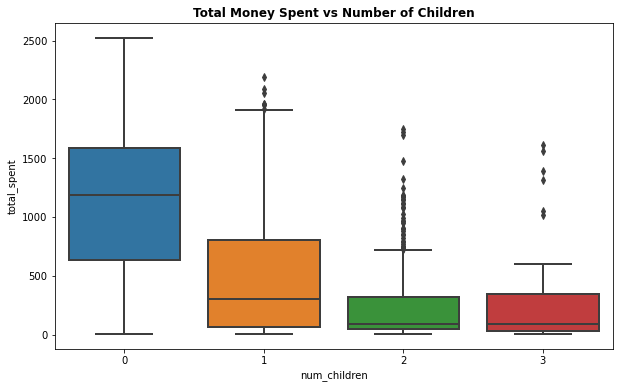

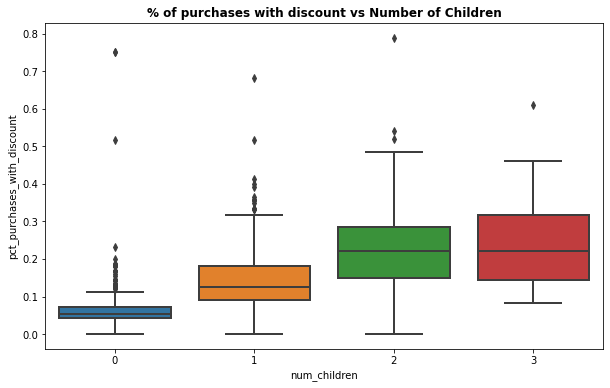

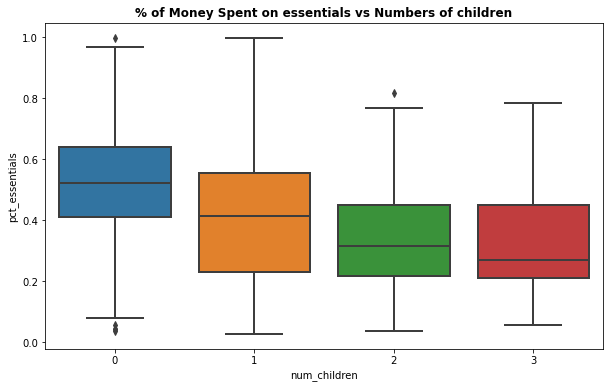

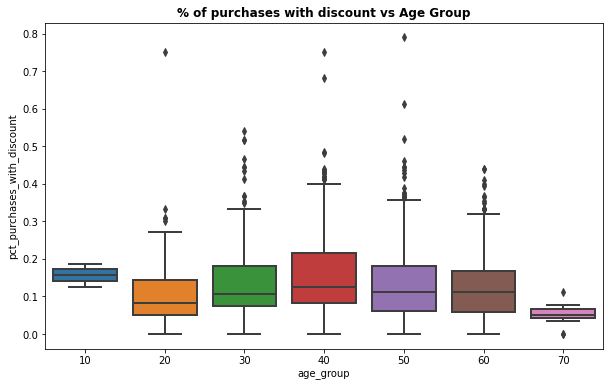

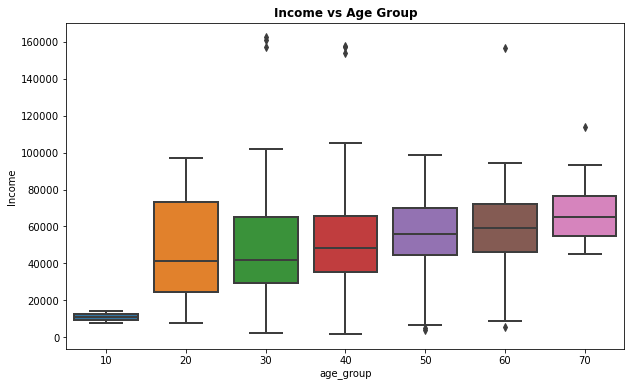

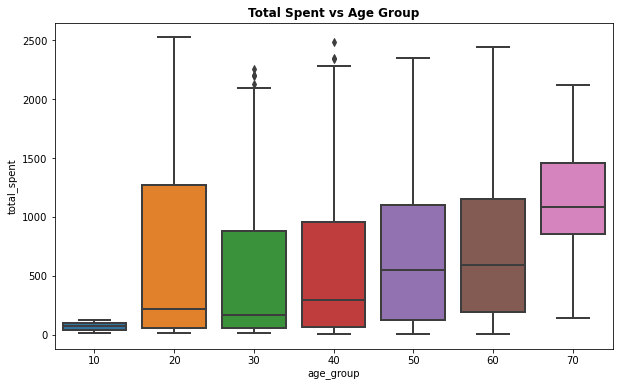

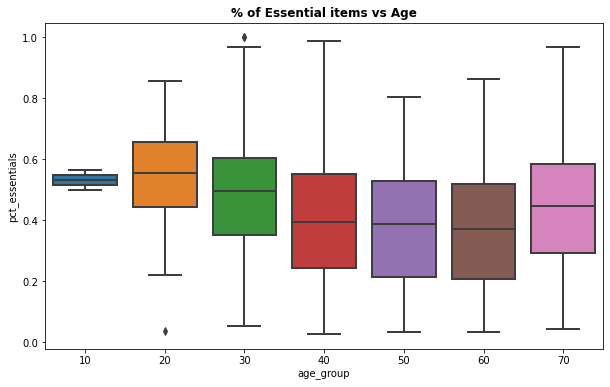

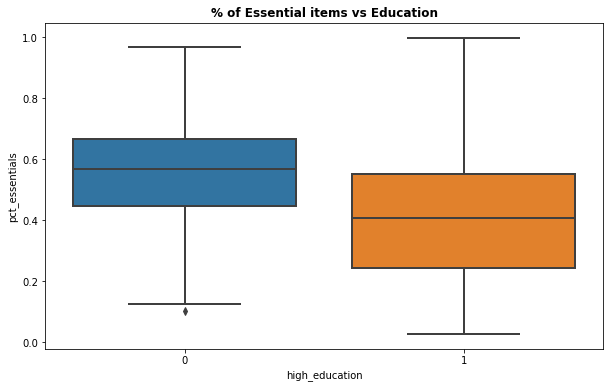

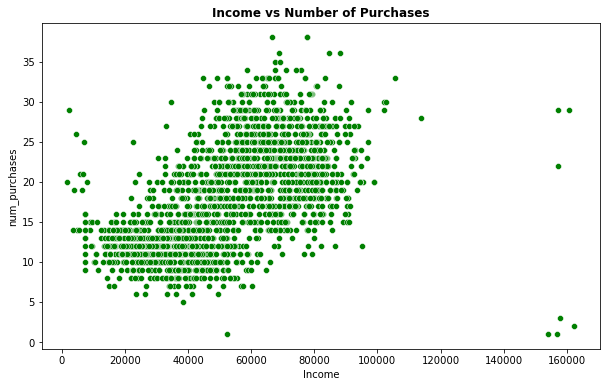

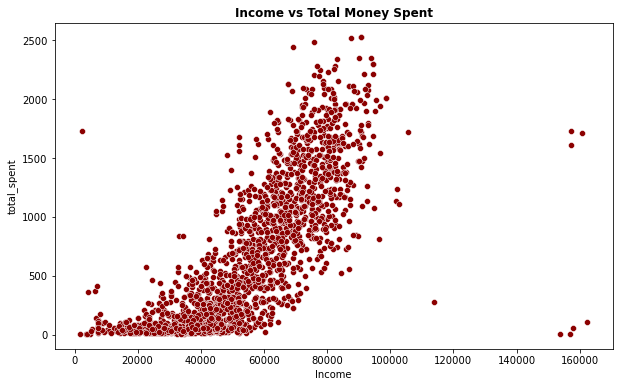

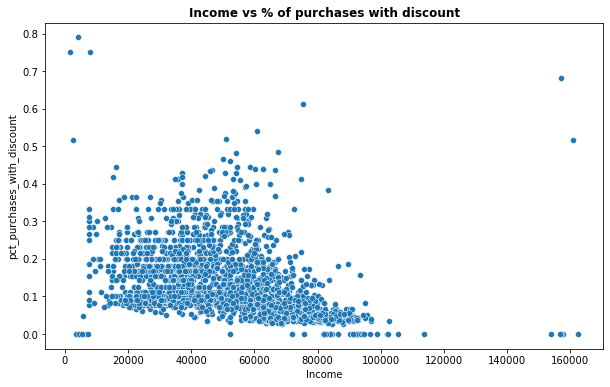

In [17]:
plt.figure(figsize = (10,6))
plt.title("Total Money Spent vs Number of Children", fontweight = 'bold')
sns.boxplot(data = df, y = 'total_spent', x = 'num_children', linewidth = 2)# interessante
plt.show()

plt.figure(figsize = (10,6))
plt.title("% of purchases with discount vs Number of Children", fontweight = 'bold')
sns.boxplot(data = df, y = 'pct_purchases_with_discount', x = 'num_children', linewidth = 2)
plt.show()

plt.figure(figsize = (10,6))
plt.title("% of Money Spent on essentials vs Numbers of children", fontweight = 'bold')
sns.boxplot(data = df, y = 'pct_essentials', x = 'num_children', linewidth = 2) ### esquisito
plt.show()


plt.figure(figsize = (10,6))
plt.title("% of purchases with discount vs Age Group", fontweight = 'bold')
sns.boxplot(data = df, y = 'pct_purchases_with_discount', x = 'age_group', linewidth = 2)
plt.show()

plt.figure(figsize = (10,6))
plt.title("Income vs Age Group", fontweight = 'bold')
sns.boxplot(data = df, y = 'Income', x = 'age_group', linewidth = 2)
plt.show()

plt.figure(figsize = (10,6))
plt.title("Total Spent vs Age Group", fontweight = 'bold')
sns.boxplot(data = df, y = 'total_spent', x = 'age_group', linewidth = 2)
plt.show()

plt.figure(figsize = (10,6))
plt.title("% of Essential items vs Age", fontweight = 'bold')
sns.boxplot(data = df, y = 'pct_essentials', x = 'age_group', linewidth = 2)# interessante
plt.show()

plt.figure(figsize = (10,6))
plt.title("% of Essential items vs Education", fontweight = 'bold')
sns.boxplot(data = df, y = 'pct_essentials', x = 'high_education', linewidth = 2)# interessante
plt.show()

plt.figure(figsize = (10,6))
plt.title("Income vs Number of Purchases", fontweight = 'bold')
sns.scatterplot(data = df, x = 'Income', y = 'num_purchases', color = 'green')
plt.show()

plt.figure(figsize = (10,6))
plt.title("Income vs Total Money Spent", fontweight = 'bold')
sns.scatterplot(data = df, x = 'Income', y = 'total_spent', color = 'darkred')
plt.show()

plt.figure(figsize = (10,6))
plt.title("Income vs % of purchases with discount", fontweight = 'bold')
sns.scatterplot(data = df, x = 'Income', y = 'pct_purchases_with_discount')
plt.show()


df = df.drop(['age_group', 'days_since_enrollment'], axis = 1)

#### From the visualizations, we can see some things:

- People with no children: Spend less money, are less inclined to wait for discounts to buy their items and spend more money on essential items (fruits, fish, meat, sweet).
- Older people have a higher income
- People with higher income spend more money, and are less inclined to wait for discounts to buy their items.

#### Dropping Unwanted Columns

In [18]:
df.drop('Education', axis = 1, inplace = True)
df.drop('dt_customer', axis = 1, inplace = True)

### Clustering

#### Standard Scaler
Some of the transformations on our data (PCA and Clustering) will envolve measuring distances. That can be problematic, considering that some features have very different ranges. We need to use the StandardScaler, so they can all have a similar range (mostly between -1 to 1).

In [19]:
### Standardization
sc = StandardScaler()
df_scaled = pd.DataFrame(sc.fit_transform(df), columns = df.columns)
display(df_scaled[:5].T)

,0,1,2,3,4
Income,0.288513,-0.262438,0.917992,-1.182621,0.295754
NumDealsPurchases,0.348738,-0.168700,-0.686137,-0.168700,1.383614
total_spent,1.680176,-0.962202,0.282541,-0.918994,-0.305762
pct_essentials,0.678727,-0.261669,-0.124932,1.427092,0.687108
num_purchases,1.700895,-1.354499,0.937047,-0.896190,0.173198
num_children,-1.264308,1.395139,-1.264308,0.065416,0.065416
pct_purchases_with_discount,-0.345812,0.905113,-0.996495,0.320003,1.336247
age,1.016868,1.273264,0.333146,-1.290693,-1.034298
relationship,-1.347635,-1.347635,0.742041,0.742041,0.742041
high_education,0.358780,0.358780,0.358780,0.358780,0.358780


### Principal Components Analysis (PCA)
In our dataset, we have a high number of features and a lot of them have a certain level of correlation between each other, and are somewhat redundant. Performing a dimensionality reduction technique is a good option to reduce the number of features, decreasing the computation cost of the algorithm, while maintaining a good amount of information from the original dataset.

This step is not mandatory, and is not really clear whether to use PCA before clustering really gives us better results. That is particularly tricky, since clustering is a non-supervisioned algorithm, which makes it harder to assess its performance.

Now, performing the PCA, we need to determine how many principal components we'll need to maintain about 70%~80% of variance of the original data.

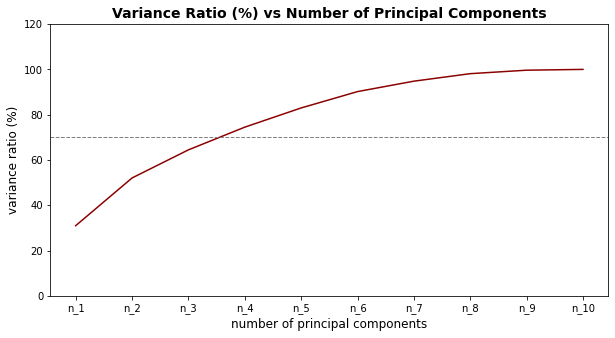

In [20]:
## Determining the number of principal components

variance_ratio = {}
for i in range(1, len(df_scaled.columns)+1):
    pca = PCA(n_components=i)
    pca.fit(df_scaled)
    variance_ratio[f'n_{i}'] = pca.explained_variance_ratio_.sum()*100
    
plt.figure(figsize = (10, 5))
plt.plot(variance_ratio.keys(), variance_ratio.values(), color = 'darkred')
plt.axhline(70, color = 'gray', ls = '--', lw = 1)
plt.title("Variance Ratio (%) vs Number of Principal Components", fontsize = 14, fontweight = 'bold')
plt.ylabel("variance ratio (%)", fontsize = 12)
plt.xlabel("number of principal components", fontsize = 12)
plt.ylim([0, 120])
plt.show()

- With 4 principal components, we have almost 70% of the variance explained. That's a good result.

In [21]:
## Applying PCA to create a new dataset with 4 Princpal Components.

pca = PCA(n_components = 4, random_state = 123)
pca.fit(df_scaled)
df_pca = pd.DataFrame(pca.transform(df_scaled),
                      columns = (["PC1", "PC2", "PC3", "PC4"]))
df_pca.head(10)

,PC1,PC2,PC3,PC4
0,-2.274351,1.038793,0.657425,1.394765
1,1.873943,0.221423,-1.444409,1.300393
2,-2.032854,-0.038882,-0.403002,-0.784897
3,1.362291,-1.679339,0.632087,-0.542764
4,0.935971,0.760547,1.514053,-0.494132
5,-0.979444,0.880919,-0.501325,-0.799625
6,0.003140,0.680897,0.827462,1.465404
7,0.839718,-0.916329,0.079205,-0.639904
8,0.578044,-1.760940,-0.250323,-0.674539
9,1.236792,0.175796,-2.292214,-0.920289


- Now we have a new dataset with the 4 principal components. In the next step, we are going to apply the k-means on this new dataset.

### K-Means
We are going to use the k-means algorithm to create our clusters. First, we'll need to determine the ideal number of clusters. We are going to to that by comparing two techniques: the elbow method and the silhouette score.

In the elbow method, we plot the WCSS vs the number of clusters. The WCSS is the sum of squared distance between each point and the centroid in a cluster. Naturally, as we increase the number of clusters, this value will always get smaller.

What we are looking for is a value of N that, from that point forward, the decrease of WCSS won't be very significative.

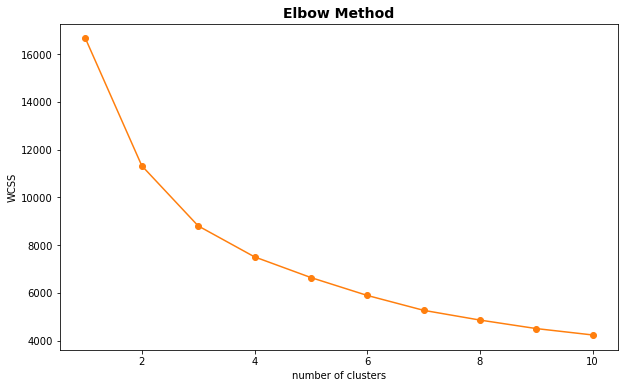

In [22]:
## Determining the ideal number of clusters: Elbow method
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=123)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss, marker='o', color = 'tab:orange')
plt.title('Elbow Method', fontsize = 14, fontweight = 'bold')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

- Taking a look at the curve, it's not really clear what is the ideal number of clusters. Let's double check it with the silhouette scores. From wikipedia: The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).

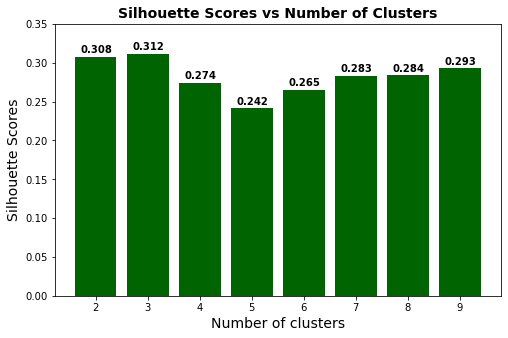

In [23]:
silhouette_scores = []

for i in range(2,10):
    m1 = KMeans(n_clusters=i, random_state=123)
    c = m1.fit_predict(df_pca)
    silhouette_scores.append(silhouette_score(df_pca, m1.fit_predict(df_pca)))

plt.figure(figsize = (8,5))
plt.bar(range(2,10), silhouette_scores, color = 'darkgreen')
plt.title("Silhouette Scores vs Number of Clusters", fontsize = 14, fontweight = 'bold')
plt.xlabel('Number of clusters', fontsize = 14) 
plt.ylabel('Silhouette Scores', fontsize = 14)
plt.ylim(0,0.35)
for a, b in enumerate(silhouette_scores):
    plt.text(a + 1.7, b + 0.005, str(round(b,3)), color='black', fontweight='bold')
plt.show()

- That settles: We are going to use the K-Means with 3 clusters, and add the results to the original dataset.

In [24]:
kmeans = KMeans(n_clusters=3, random_state=123).fit(df_pca)
pred = kmeans.predict(df_pca)
df['cluster'] = pred + 1
df.head()

,Income,NumDealsPurchases,total_spent,pct_essentials,num_purchases,num_children,pct_purchases_with_discount,age,relationship,high_education,cluster
0,58138.0,3,1617,0.552876,29,0,0.103448,58,0,1,2
1,46344.0,2,27,0.370370,9,2,0.222222,61,0,1,1
2,71613.0,1,776,0.396907,24,0,0.041667,50,1,1,2
3,26646.0,2,53,0.698113,12,1,0.166667,31,1,1,1
4,58293.0,5,422,0.554502,19,1,0.263158,34,1,1,3


### Analyzing the clusters
Now, let's compare the clusters:

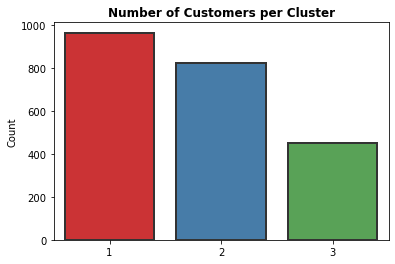

In [25]:
aux = df.cluster.value_counts()/len(df.count())
plt.title('Number of Customers per Cluster', fontweight = 'bold')
aux = df.groupby('cluster').size().reset_index()#.rename({'pct_essentials':'count'}, axis = 1)
ax = sns.barplot(x='cluster', data=aux, y = 0, linewidth=2, edgecolor=".2",  palette = 'Set1').set(ylabel="Count", xlabel = None)

In [26]:
# Creating an auxiliar dataset to help the evaluation
clusters_evaluation = df.groupby('cluster').mean().T
clusters_evaluation['mean_dataset'] = df.mean().T
clusters_evaluation

cluster,1,2,3,mean_dataset
Income,35004.772603,72422.602502,50877.711218,51961.906544
NumDealsPurchases,1.711319,1.457421,5.221729,2.326029
total_spent,108.835929,1224.389294,540.419069,605.986583
pct_essentials,0.454990,0.445566,0.304409,0.421153
num_purchases,12.330218,22.885645,20.538803,17.866279
num_children,1.131880,0.401460,1.565410,0.950805
pct_purchases_with_discount,0.139721,0.063851,0.260956,0.136283
age,42.856698,47.878345,49.793792,46.101968
relationship,0.651090,0.620438,0.676275,0.644902
high_education,0.827622,0.928224,0.933481,0.885957


In [27]:
plt.figure(figsize = (8,8))
clusters_evaluation.drop('mean_dataset', axis = 1).style.background_gradient(cmap='RdYlGn',axis=1)

cluster,1,2,3
Income,35004.772603,72422.602502,50877.711218
NumDealsPurchases,1.711319,1.457421,5.221729
total_spent,108.835929,1224.389294,540.419069
pct_essentials,0.454990,0.445566,0.304409
num_purchases,12.330218,22.885645,20.538803
num_children,1.131880,0.401460,1.565410
pct_purchases_with_discount,0.139721,0.063851,0.260956
age,42.856698,47.878345,49.793792
relationship,0.651090,0.620438,0.676275
high_education,0.827622,0.928224,0.933481


<Figure size 576x576 with 0 Axes>

- From the table above, we can have a good idea of the differences between the clusters. At first glance, we can see that the income is very important to divide the users: In the cluster 3, we have a lot of customers with medium income, the cluster 1 we have people with lower-income, and the 2, with a higher income.

#### Let's make some more visualizations, to get some more insights.

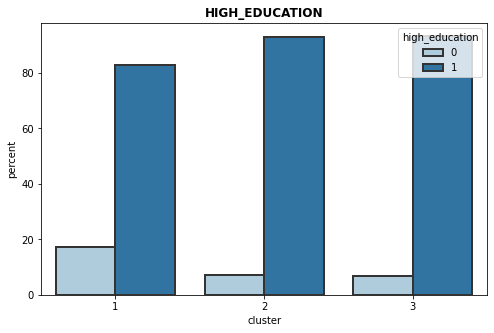

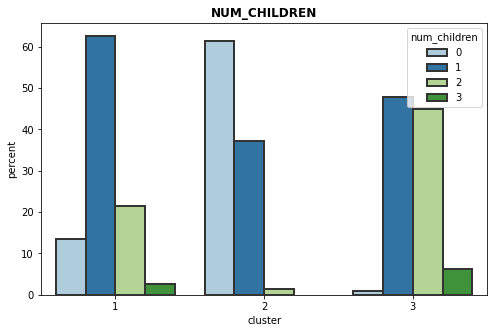

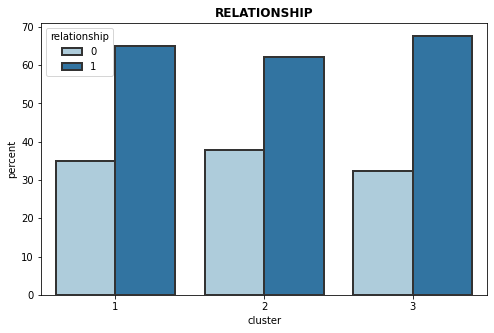

In [28]:
## Categorical Visualizations

cat_columns = ['high_education','num_children', 'relationship']

for cat in cat_columns:
    plt.figure(figsize = (8,5))
    plt.title(str.upper(cat), fontweight = 'bold')
    df_aux = df.groupby('cluster')[cat].value_counts(normalize=True).mul(100).rename('percent').reset_index()
    sns.barplot(data = df_aux, x='cluster',y='percent',hue=cat, palette = 'Paired',linewidth=2, edgecolor=".2");
    plt.show() 

#### Notes:

- Most of the users without high-education falls into the cluster 1.
- Pretty much everyone of the cluster 1 have at least 1 children.
- Pretty much everyone of the cluster 3 have 0 or 1 children

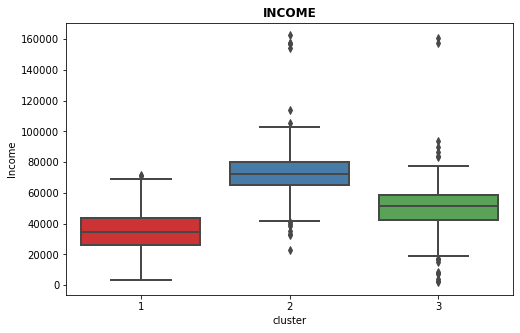

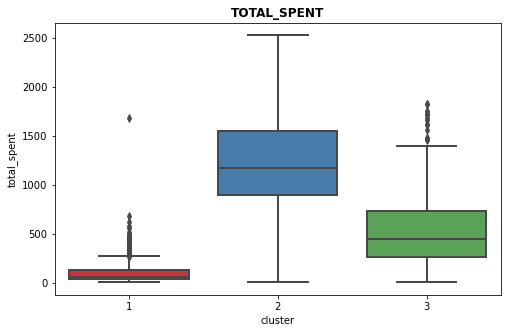

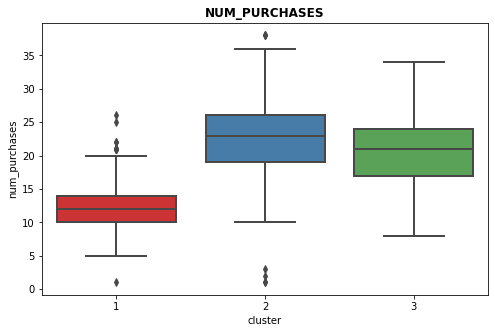

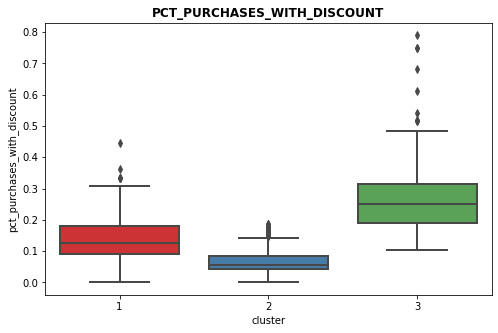

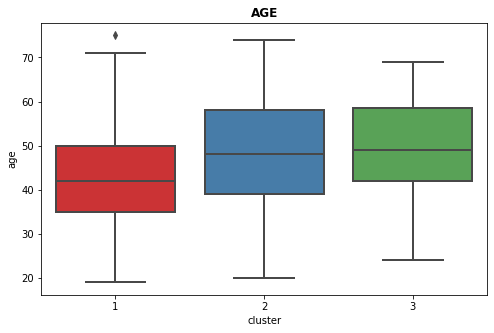

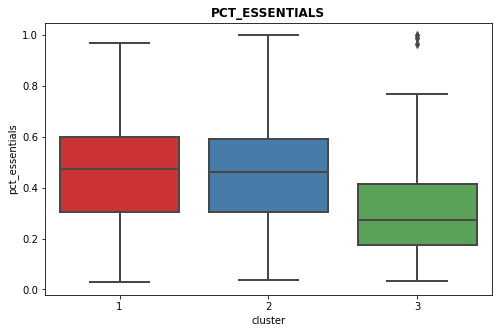

In [29]:
## Numerical Variables
num_columns = ['Income','total_spent','num_purchases', 
       'pct_purchases_with_discount', 'age', 'pct_essentials']

for num in num_columns:
    plt.figure(figsize = (8,5))
    plt.title(str.upper(num), fontweight = 'bold')
    ax = sns.boxplot(y=num, x = 'cluster', data=df, palette = 'Set1', linewidth = 2)#.set(ylabel="Count", xlabel = None)
    plt.show()

#### Notes:
- Income:

2: High Income

1: Low Income

3: Medium Income

- Total Spent:

2: high spent

1: low spent

3: medium spent

- Percentage of Items bought with discount:

3: Buys a lot of items with discount

2: Buys a lot of items without discount

- Percentage of essential items bought:

1: Buys a lot of non-essential items (wine + gold)

- Age:

1: Are considerably younger than the rest

#### Other important visualizations:

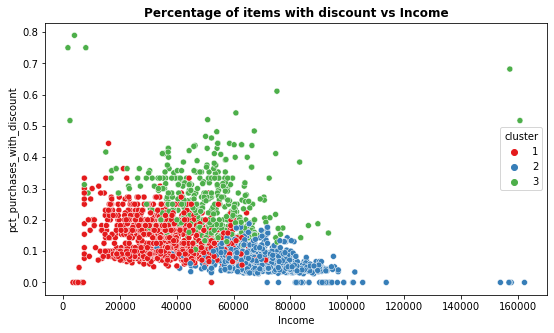

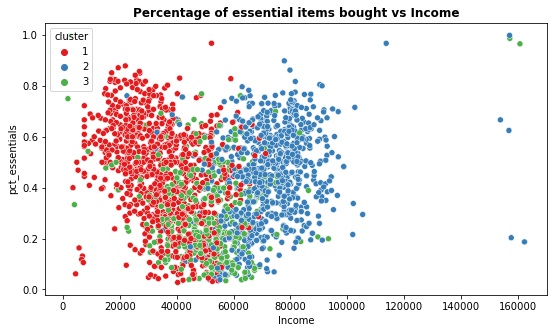

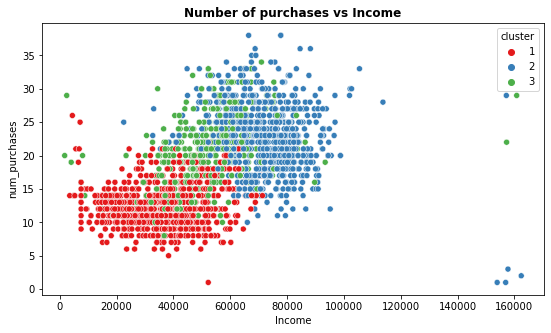

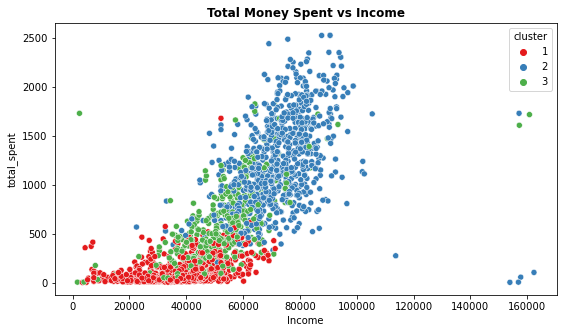

In [30]:
plt.figure(figsize = (9,5))
plt.title('Percentage of items with discount vs Income', fontweight = 'bold')
sns.scatterplot(data = df, x = 'Income', y = 'pct_purchases_with_discount', hue = 'cluster', palette = 'Set1')
plt.show()

plt.figure(figsize = (9,5))
plt.title('Percentage of essential items bought vs Income', fontweight = 'bold')
sns.scatterplot(data = df, x = 'Income', y = 'pct_essentials', hue = 'cluster', palette = 'Set1')
plt.show()

plt.figure(figsize = (9,5))
plt.title('Number of purchases vs Income', fontweight = 'bold')
sns.scatterplot(data = df, x = 'Income', y = 'num_purchases', hue = 'cluster', palette = 'Set1')
plt.show()

plt.figure(figsize = (9,5))
plt.title('Total Money Spent vs Income', fontweight = 'bold')
sns.scatterplot(data = df, x = 'Income', y = 'total_spent', hue = 'cluster', palette = 'Set1')
plt.show()

### Conclusion

#### Cluster 1:
- About 36% of the customers
- High income group
- Almost everybody have 0 or 1 children.
- Spend a lot of money
- Don't buy a lot of things with discount

#### Cluster 2:
- Bigger cluster (about 44%)
- Smaller income group
- Don't spend a lot of money
- Don't make a lot opf
- Contains most of the people without a high-education
- Is a little younger than the average of the dataset

#### Cluster 3:
- Smaller part of the customers (about 20%)
- Medium income group
- Everyone have at least 1 children
- Are very sensitive to items with discount
- Usually buys non-essential items (wine + gold)

From this clusters, we are a step closer to understand our customers behaviour. The more actionable information is that relation between the customers and the % of items bought with discount:
- We could see that people in the cluster 3 buys a lot of non-essential items, and are very sensitive to discount.
- On the other hand, people in the cluster 1 doesn't respond very well to discounts.

Therefore, it might be a good idea to concentrate efforts to send special offers to the people in the cluster 3 (and don't send to cluster 1).